*Ingreso total por cada tienda*

In [1]:
#Extraer y cargar datos de archivos CSV en un diccionario de pandas DataFrames


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Librería para crear gráficos y visualizaciones en Python
import matplotlib.dates as mdates #Módulo de matplotlib para trabajar con fechas y tiempos en gráficos
import matplotlib.ticker as ticker #Módulo de matplotlib para formatear los ejes de los gráficos
import matplotlib.colors as mcolors #Módulo de matplotlib para trabajar con colores y mapas de colores
import matplotlib.cm as cm #Módulo de matplotlib para trabajar con mapas de colores
import seaborn as sns #Librería para crear gráficos estadísticos atractivos y informativos en Python
import plotly.express as px
import sys
!{sys.executable} -m pip install --upgrade pip plotly
import plotly.graph_objects as go
import sys
!{sys.executable} -m pip install --upgrade "nbformat>=4.2.0"


from pathlib import Path #Libreria para manejar rutas de archivos y directorios de forma orientada a objetos y multiplataforma

DATA_DIR = Path("../data") #Directorio de datos, Path crea un objeto de ruta a partir de una cadena de texto, en este caso "../data" que está un nivel por encima del directorio actual

tiendas = {} #Diccionario para almacenar los dataframes de cada tienda
for csv_file in DATA_DIR.glob("tienda_*.csv"): #Itera sobre todos los archivos CSV que comienzan con "tienda_" en el directorio de datos
    tiendas[csv_file.stem] = pd.read_csv(csv_file) #csv_file.stem extrae el nombre del archivo sin la extensión.csv y lo usa como clave en el diccionario, pd.read_csv(csv_file) lee el archivo CSV y lo almacena como un dataframe de pandas

tienda_1 = tiendas["tienda_1"]
tienda_2 = tiendas["tienda_2"]
tienda_3 = tiendas["tienda_3"]
tienda_4 = tiendas["tienda_4"]







Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
print("Python que corre este código:", sys.executable)

import plotly
print("Versión de Plotly:", plotly.__version__)


Python que corre este código: C:\Users\zaire\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe
Versión de Plotly: 6.0.1


In [3]:
tienda_1.head() #Muestra las primeras filas del dataframe de la tienda 1

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
def transform_data_time (df): #Función para transformar la columna 'Fecha de Compra' a un objeto datetime
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y') #Convierte la columna 'Fecha de Compra' a un objeto datetime de pandas, especificando el formato de la fecha
    df['Fecha de Compra'] = df['Fecha de Compra'].dt.date #Extrae solo la parte de la fecha (sin hora) y la convierte a un objeto de tipo date
    return df
transform_data_time (tienda_1) 
transform_data_time (tienda_2) 
transform_data_time (tienda_3) 
transform_data_time (tienda_4) 
print (tienda_1['Fecha de Compra'].max()) 
print (tienda_1['Fecha de Compra'].min())     
print (tienda_2['Fecha de Compra'].max()) 
print (tienda_2['Fecha de Compra'].min()) 
print (tienda_3['Fecha de Compra'].max()) 
print (tienda_3['Fecha de Compra'].min()) 
print (tienda_4['Fecha de Compra'].max()) 
print (tienda_4['Fecha de Compra'].min()) 
#tienda_1['Fecha de Compra'] = tienda_1['Fecha de Compra'].astype(str) #Convierte la columna 'Fecha de Compra' a tipo string

#tienda_1['Fecha de Compra'] = pd.to_datetime(tienda_1['Fecha de Compra'], format='%d/%m/%Y') #Convierte la columna 'Fecha de Compra' a un objeto datetime de pandas, especificando el formato de la fecha
#tienda_1['Fecha de Compra'] = tienda_1['Fecha de Compra'].dt.date 
#Extrae solo la parte de la fecha (sin hora) y la convierte a un objeto de tipo date


2023-03-31
2020-01-01
2023-03-31
2020-01-01
2023-03-31
2020-01-01
2023-03-30
2020-01-01


1. #Ingresos totales por tienda

In [5]:
#Función para calcular los Ingresos totales por tienda
def ingresos_totales(df, nombre_tienda): #df es el dataframe de la tienda y nombre_tienda es el nombre de la tienda 
    ingresos = df['Precio'].sum() #Suma la columna 'Precio' del dataframe df

    print (f'Los ingresos totales de la {nombre_tienda} del 2020-01-31 al 2023-03-31 son de  ${ingresos:.2f}')
    return ingresos #Devuelve los ingresos totales
ingresos_t1 = ingresos_totales(tienda_1, "Tienda 1")
ingresos_t2 = ingresos_totales(tienda_2, "Tienda 2")
ingresos_t3 = ingresos_totales(tienda_3, "Tienda 3")
ingresos_t4 = ingresos_totales(tienda_4, "Tienda 4")





Los ingresos totales de la Tienda 1 del 2020-01-31 al 2023-03-31 son de  $1150880400.00
Los ingresos totales de la Tienda 2 del 2020-01-31 al 2023-03-31 son de  $1116343500.00
Los ingresos totales de la Tienda 3 del 2020-01-31 al 2023-03-31 son de  $1098019600.00
Los ingresos totales de la Tienda 4 del 2020-01-31 al 2023-03-31 son de  $1038375700.00


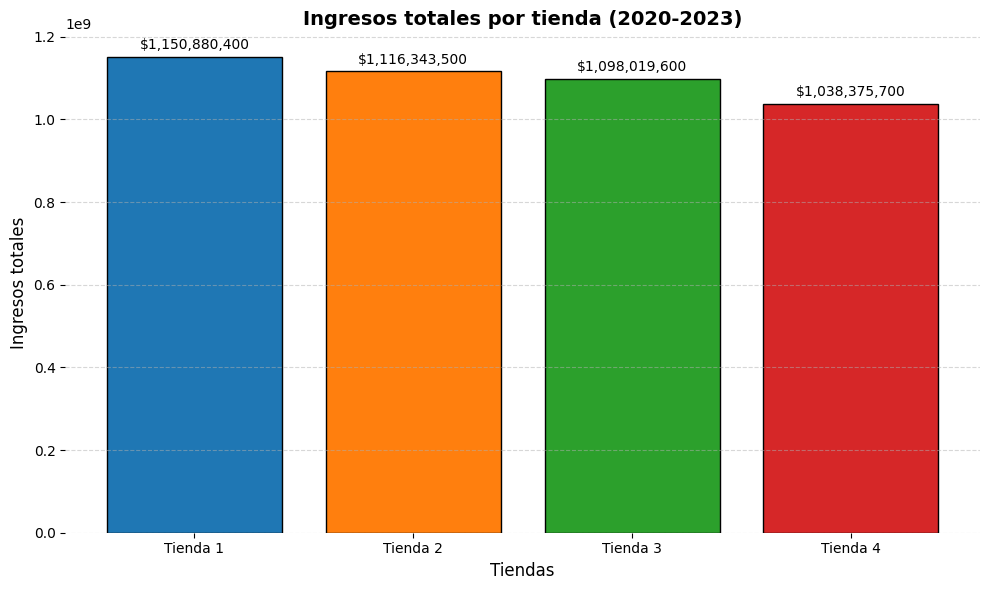

In [6]:
#Graficar los ingresos totales de cada tienda en un solo gráfico en el eje x son los ingresos y el el eje y es el nombre de la tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'] #Lista con los nombres de las tiendas
ingresos = [ingresos_t1, ingresos_t2, ingresos_t3, ingresos_t4] #Lista con los ingresos totales de cada tienda
palette = sns.color_palette("tab10") #Paleta de colores pastel de seaborn
plt.figure(figsize=(10, 6)) #Crea una figura de tamaño 10x6 pulgadas
bars =plt.bar (tiendas, ingresos, color=palette, edgecolor ='black', linewidth=1) #Crea un gráfico de barras con los nombres de las tiendas en el eje x y los ingresos totales en el eje y
for bar in bars:
    altura = bar.get_height() #Obtiene la altura de cada barra
    plt.text(bar.get_x() + bar.get_width()/2, altura +max(ingresos)*0.01, f'${altura:,.0f}', ha='center', va='bottom', fontsize=10) #Añade el valor de los ingresos totales encima de cada barra
    
plt.xlabel('Tiendas', fontsize=12) #Etiqueta del eje x
plt.ylabel('Ingresos totales', fontsize=12) #Etiqueta del eje y
plt.title('Ingresos totales por tienda (2020-2023)', fontsize=14, weight='bold') #Título del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.5) #Añade una cuadrícula en el eje y con líneas discontinuas
sns.despine(left=True, bottom=True) #Elimina los bordes del gráfico
plt.tight_layout() #Ajusta el diseño del gráfico para que no se superpongan los elementos
plt.show() #Muestra el gráfico




2. #Ventas por categorías

In [7]:
tienda_1.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [8]:
def ingresos_categoria(df, nombre_tienda): #Función para calcular los Ingresos totales por categoría
    ingresos_categoria = df.groupby('Categoría del Producto').agg(Productos_vendidos=('Producto', 'count'), Total=('Precio', 'sum')).sort_values(by='Productos_vendidos', ascending=False)

    #Agrupa el dataframe por la columna 'Categoría de producto', suma los precios y ordena los resultados de mayor a menor
    print (f'Las ventas totales de la {nombre_tienda} por categoría son:\n{ingresos_categoria}')
    return ingresos_categoria #Devuelve los ingresos totales por categoría
ingresos_categoria_t1 = ingresos_categoria(tienda_1, "Tienda 1")


Las ventas totales de la Tienda 1 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 465  187633700.0
Electrónicos                            448  429493500.0
Juguetes                                324   17995700.0
Electrodomésticos                       312  363685200.0
Deportes y diversión                    284   39290000.0
Instrumentos musicales                  182   91299000.0
Libros                                  173    8784900.0
Artículos para el hogar                 171   12698400.0


In [9]:
ingresos_categoria_t2 = ingresos_categoria(tienda_2, "Tienda 2")

Las ventas totales de la Tienda 2 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 442  176426300.0
Electrónicos                            422  410831100.0
Juguetes                                313   15945400.0
Electrodomésticos                       305  348567800.0
Deportes y diversión                    275   34744500.0
Instrumentos musicales                  224  104990300.0
Libros                                  197   10091200.0
Artículos para el hogar                 181   14746900.0


In [10]:
ingresos_categoria_t3 = ingresos_categoria(tienda_3, "Tienda 3")

Las ventas totales de la Tienda 3 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 499  201072100.0
Electrónicos                            451  410775800.0
Juguetes                                315   19401100.0
Electrodomésticos                       278  329237900.0
Deportes y diversión                    277   35593100.0
Libros                                  185    9498700.0
Artículos para el hogar                 177   15060000.0
Instrumentos musicales                  177   77380900.0


In [11]:
ingresos_categoria_t4 = ingresos_categoria(tienda_4, "Tienda 4")

Las ventas totales de la Tienda 4 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 480  192528900.0
Electrónicos                            451  409476100.0
Juguetes                                338   20262200.0
Deportes y diversión                    277   33350100.0
Electrodomésticos                       254  283260200.0
Artículos para el hogar                 201   15074500.0
Libros                                  187    9321300.0
Instrumentos musicales                  170   75102400.0


In [12]:
#Cancatenación de df para la visualización
pv1 = ingresos_categoria_t1[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 1'})
pv2 = ingresos_categoria_t2[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 2'})
pv3 = ingresos_categoria_t3[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 3'})
pv4 = ingresos_categoria_t4[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 4'})
df_vendidos_categoria_tiendas = pd.concat([pv1, pv2, pv3, pv4], axis=1) #Concatena los dataframes por columnas (axis=1)
df_vendidos_categoria_tiendas

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


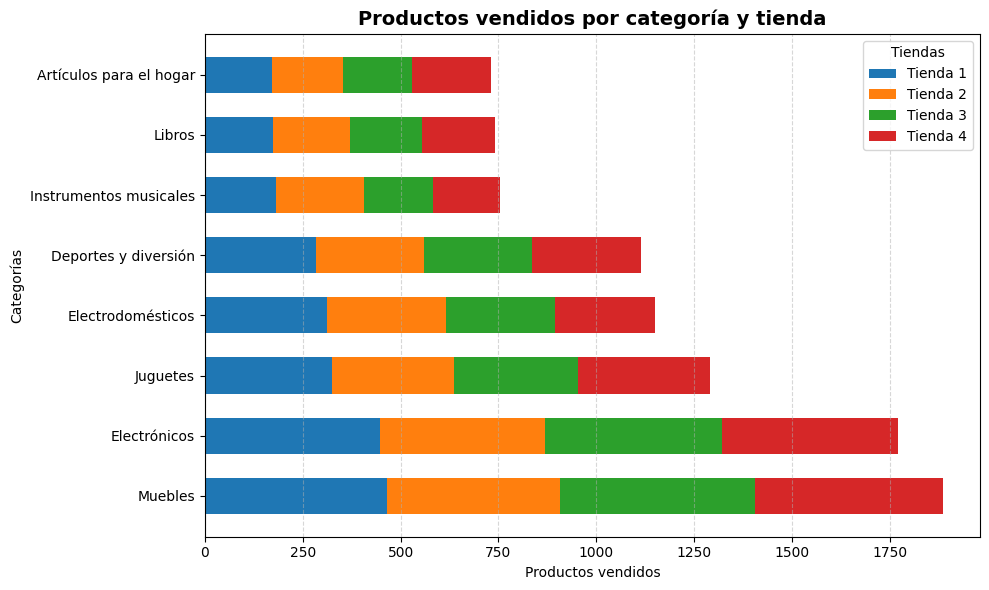

In [13]:
#Extraer la lista de categorías (indice del df)
categorias = df_vendidos_categoria_tiendas.index.tolist() #Convierte el índice del dataframe en una lista

#Extraer el nombre de tiendas (columnas del df) y su valores numéricos
tiendas = df_vendidos_categoria_tiendas.columns.tolist() #Convierte las columnas del dataframe en una lista
#Pra cada tienda, obtenemos un array con los productos vendidos por categoría
datos = [df_vendidos_categoria_tiendas[tienda].values for tienda in tiendas] #Extrae los valores de cada columna (tienda) y los almacena en una lista

#Creamos la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6)) #Crea una figura y un eje para el gráfico

#Definimos posiciones y grosor de las barras
y = np.arange(len(categorias)) # posiciones en el eje y: 0,1,2,... según nº de categorías
height = 0.6 #Grosor de las barras

#Inicializar el array de ceros como "offset" (left) para apilar las barras
left = np.zeros(len(categorias)) 

#Recorremos tienda por tienda apilando sus valores
for tienda, valores in zip(tiendas, datos):
    # Dibujamos una porción de barra horizontal:
    #      - y: coordenadas verticales de cada barra
    #      - valores: longitud de cada segmento
    #      - height: grosor
    #      - left: desplazamiento inicial para apilar encima del anterior
    barras = ax.barh(y, valores, height, left=left, label=tienda)
# Actualizamos 'left' sumando los valores de esta tienda,
    #de modo que el siguiente segmento empiece justo donde acaba éste
    left += valores
# Añadimos etiquetas a las barras
ax.set_yticks(y) #Establece las posiciones de las etiquetas en el eje y
ax.set_yticklabels(categorias) #Establece las etiquetas del eje y con la lista de categorías

#Titulos y etiquetas del eje x e y
ax.set_xlabel('Productos vendidos') #Etiqueta del eje x
ax.set_ylabel('Categorías') #Etiqueta del eje y
ax.set_title('Productos vendidos por categoría y tienda', fontsize=14, weight='bold') #Título del gráfico
ax.legend(title='Tiendas') #Añade una leyenda con el título 'Tiendas'
ax.grid(axis='x', linestyle='--', alpha=0.5) #Añade una cuadrícula en el eje x con líneas discontinuas
plt.tight_layout() #Ajusta el diseño del gráfico para que no se superpongan los elementos
plt.show() #Muestra el gráfico

3. #Comentarios y calificaciones

In [14]:
tienda_1.columns


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [15]:

#Contar los productos con más de 4 estrellas
tienda_1[tienda_1['Calificación'] > 4].groupby('Producto')['Calificación'].count().sort_values(ascending=False).head(50) #Agrupa el dataframe por la columna 'Producto', cuenta los productos con más de 4 estrellas y ordena los resultados de mayor a menor, muestra los 10 primeros

Producto
Batería                        36
Bloques de construcción        34
TV LED UHD 4K                  34
Microondas                     33
Secadora de ropa               33
Cubertería                     32
Armario                        32
Impresora                      31
Ajedrez de madera              31
Refrigerador                   31
Mesa de noche                  30
Guitarra eléctrica             30
Guitarra acústica              29
Carrito de control remoto      29
Lavavajillas                   29
Iniciando en programación      28
Bicicleta                      28
Balón de baloncesto            27
Mesa de centro                 27
Smartwatch                     26
Vaso térmico                   26
Balón de voleibol              26
Estufa                         26
Juego de mesa                  25
Smart TV                       25
Iphone 15                      25
Cama box                       25
Auriculares                    25
Asistente virtual              25
Sofá 

In [16]:
def promedio_calificacion(df, nombre_tienda): #Función para calcular la calificación promedio total  por tienda y por todoas lo productos
   
    
    promedio = df['Calificación'].mean() #Agrupa el dataframe por la columna 'Producto', calcula la calificación promedio y ordena los resultados de mayor a menor
    
    print (f'La calificación promedio de los productos en la {nombre_tienda} es:\n{promedio:.2f}')
    return promedio #Devuelve la calificación promedio
promedio_t1 = promedio_calificacion(tienda_1, "Tienda 1")
promedio_t2 = promedio_calificacion(tienda_2, "Tienda 2")
promedio_t3 = promedio_calificacion(tienda_3, "Tienda 3")
promedio_t4 = promedio_calificacion(tienda_4, "Tienda 4")    

La calificación promedio de los productos en la Tienda 1 es:
3.98
La calificación promedio de los productos en la Tienda 2 es:
4.04
La calificación promedio de los productos en la Tienda 3 es:
4.05
La calificación promedio de los productos en la Tienda 4 es:
4.00


In [17]:
def productos_mas_menos_vendidos(df, nombre_tienda):
    # Agrupa por 'Producto', cuenta y toma el primer nombre de producto en cada grupo
    productos_mas_vendidos = (
        df.groupby('Producto')
          .agg(producto=('Producto', 'first'),
               Ventas=('Producto', 'count'))
          .sort_values(by='Ventas', ascending=False)
          .head(10)
    )
    
    productos_menos_vendidos = (
        df.groupby('Producto')
          .agg(producto=('Producto', 'first'),
               Ventas=('Producto', 'count'))
          .sort_values(by='Ventas', ascending=True)
          .head(10)
    )
    
    print(f'Los productos más vendidos en la {nombre_tienda} son:\n{productos_mas_vendidos}')
    print(f'Los productos menos vendidos en la {nombre_tienda} son:\n{productos_menos_vendidos}')
    return productos_mas_vendidos, productos_menos_vendidos

# Llamada de ejemplo
productos_mas_menos_vendidos(tienda_1, "Tienda 1")

Los productos más vendidos en la Tienda 1 son:
                                        producto  Ventas
Producto                                                
Armario                                  Armario      60
TV LED UHD 4K                      TV LED UHD 4K      60
Microondas                            Microondas      60
Secadora de ropa                Secadora de ropa      58
Mesa de noche                      Mesa de noche      56
Bloques de construcción  Bloques de construcción      56
Balón de baloncesto          Balón de baloncesto      55
Bicicleta                              Bicicleta      54
Impresora                              Impresora      54
Vaso térmico                        Vaso térmico      54
Los productos menos vendidos en la Tienda 1 son:
                                                producto  Ventas
Producto                                                        
Auriculares con micrófono      Auriculares con micrófono      33
Celular ABXY             

(                                        producto  Ventas
 Producto                                                
 Armario                                  Armario      60
 TV LED UHD 4K                      TV LED UHD 4K      60
 Microondas                            Microondas      60
 Secadora de ropa                Secadora de ropa      58
 Mesa de noche                      Mesa de noche      56
 Bloques de construcción  Bloques de construcción      56
 Balón de baloncesto          Balón de baloncesto      55
 Bicicleta                              Bicicleta      54
 Impresora                              Impresora      54
 Vaso térmico                        Vaso térmico      54,
                                                 producto  Ventas
 Producto                                                        
 Auriculares con micrófono      Auriculares con micrófono      33
 Celular ABXY                                Celular ABXY      33
 Olla de presión                       

In [18]:
def productos_mas_menos_vendidos(df, nombre_tienda, top_n=10):
    """
    Devuelve los top_n productos más vendidos y menos vendidos
    a partir de un DataFrame que ya solo contiene las ventas de la tienda.
    """
    # 1. Contar cuántas veces aparece cada producto
    conteo = (
        df['Producto']
        .value_counts()                  # Serie: índice=Producto, valor=Ventas
        .rename_axis('Producto')        # pone nombre a la columna índice
        .reset_index(name='Ventas')     # convierte en DataFrame con columnas
    )
    
    # 2. Extraer top N más y menos vendidos
    mas_vendidos   = conteo.nlargest(top_n, 'Ventas').reset_index(drop=True)
    menos_vendidos = conteo.nsmallest(top_n, 'Ventas').reset_index(drop=True)
    
    # 3. Mostrar resultados
    print(f"Top {top_n} productos MÁS vendidos en '{nombre_tienda}':")
    print(mas_vendidos.to_string(index=False))
    print("\n" + "-"*40 + "\n")
    print(f"Top {top_n} productos MENOS vendidos en '{nombre_tienda}':")
    print(menos_vendidos.to_string(index=False))
    
    return mas_vendidos, menos_vendidos
productos_mas_menos_vendidos(tienda_1, "Tienda 1", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos más y menos vendidos


Top 10 productos MÁS vendidos en 'Tienda 1':
               Producto  Ventas
             Microondas      60
          TV LED UHD 4K      60
                Armario      60
       Secadora de ropa      58
          Mesa de noche      56
Bloques de construcción      56
    Balón de baloncesto      55
              Bicicleta      54
           Vaso térmico      54
           Refrigerador      54

----------------------------------------

Top 10 productos MENOS vendidos en 'Tienda 1':
                   Producto  Ventas
  Auriculares con micrófono      33
               Celular ABXY      33
            Olla de presión      35
                  Pandereta      36
                    Mochila      39
Ciencia de datos con Python      39
          Asistente virtual      40
                Muñeca bebé      40
            Mesa de comedor      40
             Dinosaurio Rex      40


(                  Producto  Ventas
 0               Microondas      60
 1            TV LED UHD 4K      60
 2                  Armario      60
 3         Secadora de ropa      58
 4            Mesa de noche      56
 5  Bloques de construcción      56
 6      Balón de baloncesto      55
 7                Bicicleta      54
 8             Vaso térmico      54
 9             Refrigerador      54,
                       Producto  Ventas
 0    Auriculares con micrófono      33
 1                 Celular ABXY      33
 2              Olla de presión      35
 3                    Pandereta      36
 4                      Mochila      39
 5  Ciencia de datos con Python      39
 6            Asistente virtual      40
 7                  Muñeca bebé      40
 8              Mesa de comedor      40
 9               Dinosaurio Rex      40)

In [19]:
def productos_mas_vendidos(df, nombre_tienda, top_n=10):
    conteo = (
        df['Producto']
        .value_counts()
        .rename_axis('Producto')
        .reset_index(name='Ventas')
    )
    return (
        conteo
            .nlargest(top_n, 'Ventas')      # → DataFrame con las top_n filas ordenadas desc.
            .reset_index(drop=True)         # → índice limpio: 0, 1, 2, …, top_n-1
)

# Ahora la llamada no imprime nada, solo devuelve el df
productos_mas_vendidos_t1 = productos_mas_vendidos(tienda_1, "Tienda 1", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos menos vendidos
productos_mas_vendidos_t1

,Producto,Ventas
0,Microondas,60
1,TV LED UHD 4K,60
2,Armario,60
3,Secadora de ropa,58
4,Mesa de noche,56
5,Bloques de construcción,56
6,Balón de baloncesto,55
7,Bicicleta,54
8,Vaso térmico,54
9,Refrigerador,54


In [20]:
productos_mas_vendidos_t2 = productos_mas_vendidos(tienda_2, "Tienda 1", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos menos vendidos
productos_mas_vendidos_t2

,Producto,Ventas
0,Iniciando en programación,65
1,Microondas,62
2,Batería,61
3,Guitarra acústica,58
4,Pandereta,58
5,Secadora de ropa,57
6,Iphone 15,55
7,Bloques de construcción,54
8,Armario,54
9,Set de ollas,52


In [21]:
productos_mas_vendidos_t3 = productos_mas_vendidos(tienda_3, "Tienda 3", top_n=10) 
productos_mas_vendidos_t3

,Producto,Ventas
0,Kit de bancas,57
1,Mesa de comedor,56
2,Cama king,56
3,Set de ollas,55
4,Mesa de noche,55
5,Smart TV,54
6,Estufa,53
7,Cuerda para saltar,53
8,Modelado predictivo,53
9,Carrito de control remoto,52


In [22]:
productos_mas_vendidos_t4 = productos_mas_vendidos(tienda_4, "Tienda 4", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos menos vendidos
productos_mas_vendidos_t4

,Producto,Ventas
0,Cama box,62
1,Cubertería,59
2,Dashboards con Power BI,56
3,Cama king,56
4,Carrito de control remoto,55
5,Mesa de comedor,55
6,Mesa de noche,55
7,Smart TV,54
8,Bloques de construcción,54
9,Pandereta,52


In [23]:
def productos_menos_vendidos(df, nombre_tienda, top_n=10):
    conteo = (
        df['Producto']
        .value_counts()
        .rename_axis('Producto')
        .reset_index(name='Ventas')
    )
    return (
        conteo
            .nsmallest(top_n, 'Ventas')      # → DataFrame con las top_n filas ordenadas desc.
            .reset_index(drop=True)         # → índice limpio: 0, 1, 2, …, top_n-1
)

# Ahora la llamada no imprime nada, solo devuelve el df
productos_menos_vendidos_t1 = productos_menos_vendidos(tienda_1, "Tienda 1", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos menos vendidos
productos_menos_vendidos_t1

,Producto,Ventas
0,Auriculares con micrófono,33
1,Celular ABXY,33
2,Olla de presión,35
3,Pandereta,36
4,Mochila,39
5,Ciencia de datos con Python,39
6,Asistente virtual,40
7,Muñeca bebé,40
8,Mesa de comedor,40
9,Dinosaurio Rex,40


In [24]:
productos_menos_vendidos_t2 = productos_menos_vendidos(tienda_2, "Tienda 1", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos menos vendidos
productos_menos_vendidos_t2

,Producto,Ventas
0,Juego de mesa,32
1,Mesa de comedor,34
2,Impresora,34
3,Sillón,35
4,Auriculares,37
5,Asistente virtual,38
6,Cubertería,39
7,Smart TV,40
8,Celular ABXY,41
9,Balón de baloncesto,42


In [25]:
productos_menos_vendidos_t3 = productos_menos_vendidos(tienda_3, "Tienda 3", top_n=10)
productos_menos_vendidos_t3

,Producto,Ventas
0,Bloques de construcción,35
1,Set de vasos,36
2,Mochila,36
3,Microondas,36
4,Vaso térmico,38
5,Guitarra eléctrica,38
6,Cubertería,39
7,Muñeca bebé,39
8,Auriculares con micrófono,39
9,Asistente virtual,39


In [40]:
productos_mas_vendidos_t4 = productos_mas_vendidos(tienda_4, "Tienda 4", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos menos vendidos
productos_mas_vendidos_t4

,Producto,Ventas
0,Cama box,62
1,Cubertería,59
2,Dashboards con Power BI,56
3,Cama king,56
4,Carrito de control remoto,55
5,Mesa de comedor,55
6,Mesa de noche,55
7,Smart TV,54
8,Bloques de construcción,54
9,Pandereta,52


In [41]:
productos_menos_vendidos_t4 = productos_menos_vendidos(tienda_4, "Tienda 4", top_n=10) #Llama a la función para la tienda 1 y muestra los 10 productos menos vendidos
productos_menos_vendidos_t4

,Producto,Ventas
0,Guitarra eléctrica,33
1,Armario,34
2,Guitarra acústica,37
3,Lavadora de ropa,38
4,Refrigerador,38
5,Ciencia de datos con Python,38
6,Celular ABXY,39
7,Ajedrez de madera,39
8,Smartwatch,39
9,TV LED UHD 4K,40


In [ ]:
def diagrama_productos_mas_menos_vendidos(producto_mas, producto_menos, valores_mas, valores_menos,nombre_tienda):
    """
    Devuelve un diagrama de dispersión con los productos más y menos vendidos
    a partir de un DataFrame que ya solo contiene las ventas de la tienda.
    """
    fig = go.Figure()

# Trazas con símbolos distintos y contraste de colores
    fig.add_trace(go.Scatter(
        x=valores_mas,
        y=producto_mas,
        mode="markers",
        name="Top vendidos",
        marker=dict(
            symbol="circle",
            color="crimson",
            size=14,
            line=dict(width=2, color="darkred"),
            opacity=0.8
        ),
        hovertemplate="%{y}<br>Ventas: %{x}<extra></extra>"
    ))

    fig.add_trace(go.Scatter(
        x=valores_menos,
        y=producto_menos,
        mode="markers",
        name="Menos vendidos",
        marker=dict(
            symbol="circle-open",
            color="gold",
            size=14,
            line=dict(width=2, color="darkgoldenrod"),
            opacity=0.8
        ),
        hovertemplate="%{y}<br>Ventas: %{x}<extra></extra>"
    ))

    # Layout estilizado
    fig.update_layout(
        template="plotly_white",        # Base limpia y profesional
        title=dict(
            text=f"{nombre_tienda}: Productos más y menos vendidos",
            font=dict(family="Arial Black", size=20, color="#333333"),
            x=0.5,                      # Centrar título
        ),
        font=dict(family="Calibri", size=12, color="#555555"),
        plot_bgcolor="whitesmoke",      # Color de área de trazado
        paper_bgcolor="white",          # Color del lienzo
        legend=dict(
            title="Categoría",
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5,
            bgcolor="rgba(255,255,255,0.8)",
            bordercolor="#CCCCCC",
            borderwidth=1
        ),
        margin=dict(l=120, r=40, t=100, b=40)
    )

    # Ejes con cuadrícula sutil
    fig.update_xaxes(
        title_text="Número de ventas",
        showgrid=True,
        gridcolor="lightgray",
        zeroline=False
    )
    fig.update_yaxes(
        title_text="Producto",
        showgrid=False
    )

    fig.show()
diagrama_productos_mas_menos_vendidos(productos_mas_vendidos_t1['Producto'], productos_menos_vendidos_t1['Producto'], productos_mas_vendidos_t1['Ventas'], productos_menos_vendidos_t1['Ventas'],"Tienda 1")



In [36]:
diagrama_productos_mas_menos_vendidos(productos_mas_vendidos_t2['Producto'], productos_menos_vendidos_t2['Producto'], productos_mas_vendidos_t2['Ventas'], productos_menos_vendidos_t2['Ventas'],"Tienda 2")

In [38]:
diagrama_productos_mas_menos_vendidos(productos_mas_vendidos_t3['Producto'], productos_menos_vendidos_t3['Producto'], productos_mas_vendidos_t3['Ventas'], productos_menos_vendidos_t3['Ventas'],"Tienda 3")

In [42]:
diagrama_productos_mas_menos_vendidos(productos_mas_vendidos_t4['Producto'], productos_menos_vendidos_t4['Producto'], productos_mas_vendidos_t4['Ventas'], productos_menos_vendidos_t4['Ventas'],"Tienda 4")